<a href="https://colab.research.google.com/github/saksham926/PEDIATRIC-PNEUMONIA-DETECTION/blob/main/pediatric_pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9364007-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-9476607-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-2831144-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-7720431-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1514320-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-6950003-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-874167-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-4276353-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9857270-0004.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-3565661-000

/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-7064932-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-5911257-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-2147615-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-8666617-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-274469-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-2474652-0005.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-5904540-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-8550709-0004.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-4198099-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-1553110-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIR

/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-5615173-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-7022864-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-5268802-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-6065052-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-669291-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-8060977-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-9487238-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-6295192-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-1116080-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-2516070-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/

In [ ]:
#importing the libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#importing cv2 library to load image data

import cv2
import os
import glob
import seaborn as sns

train_images=[]
train_labels=[]

#storing the train dataset images into train_images and it's labels in train_labels
for directory_path in glob.glob('../input/labeled-chest-xray-images/chest_xray/train/*'):
    label=directory_path.split('\\')[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,'*.jpeg')):
        img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(224,224))
        train_images.append(img)
        train_labels.append(label)

../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA
../input/labeled-chest-xray-images/chest_xray/train/NORMAL


In [ ]:
#displaying the pixels 

print(train_images[:2])



[array([[  0,   0,   0, ...,  10, 239,   7],
       [  0,   0,   0, ...,   4,   8,   3],
       [  0,   0,   0, ...,   1, 183,  11],
       ...,
       [  0,   4,   2, ...,   0,   0,   0],
       [ 16, 227, 195, ...,   0,   0,  18],
       [ 11,   2,   6, ...,   0,   0,   0]], dtype=uint8), array([[39, 41, 45, ..., 34, 30, 48],
       [42, 45, 44, ..., 35, 30, 40],
       [38, 44, 42, ..., 32, 32, 27],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)]


In [ ]:
#storing the test dataset images into test_images and it's labels in test_labels

test_images=[]
test_labels=[]

for directory_path in glob.glob('../input/labeled-chest-xray-images/chest_xray/test/*'):
    label=directory_path.split('\\')[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,'*.jpeg')):
        img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(224,224))
        test_images.append(img)
        test_labels.append(label)




../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA
../input/labeled-chest-xray-images/chest_xray/test/NORMAL


In [ ]:
train_images[0].shape

(224, 224)

In [ ]:
#converting all the data in the numpy array to do further calculations
train_images=np.array(train_images)
train_images=train_images/255

In [ ]:
#converting all the data in the numpy array to do further calculations
train_labels=np.array(train_labels)
test_images=np.array(test_images)
test_images=test_images/255
test_labels=np.array(test_labels)


In [ ]:
#converting the categorical features in this case pneumonia and normal to numbers(0 and 1) 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
le.fit(test_labels)
test_labels=le.transform(test_labels)

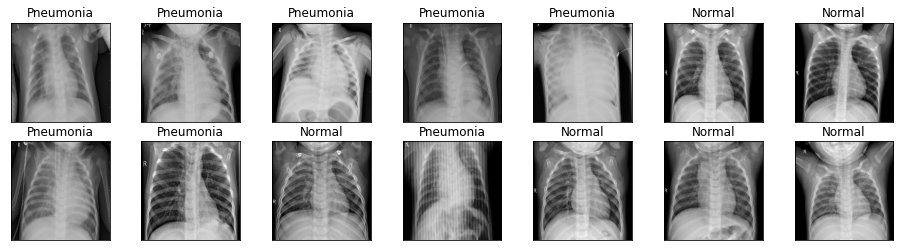

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(16, 4))

indices = np.random.choice(len(train_images), 14)
counter = 0

for i in range(2):
    for j in range(7):
        if train_labels[indices[counter]]==1:
            axes[i,j].set_title('Pneumonia')
        elif train_labels[indices[counter]]==0:
            axes[i,j].set_title('Normal')
        axes[i,j].imshow(train_images[indices[counter]], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()

In [ ]:
#converting the dataset into the desired shape to feed it into a convolution neural network
train_images=train_images.reshape(len(train_images),224,224,1)
test_images=test_images.reshape(len(test_images),224,224,1)

In [ ]:
def build_model(hp):
    model=keras.Sequential([
        #adding convoluyion layer
        keras.layers.Conv2D(filters=hp.Int('conv_1_filter',min_value=15,max_value=400,step=16),
                           kernel_size=hp.Choice('conv_1_kernal',values=[3,5]),
                           activation='relu',
                           input_shape=(224,224,1)),
        #adding max pooling layer
        keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'),
        #adding dropout layer
        keras.layers.Dropout(0.2),
        
        
        #adding convoluyion layer with relu activation function
        keras.layers.Conv2D(filters=hp.Int('conv_2_filter',min_value=20,max_value=300,step=16),
                           kernel_size=hp.Choice('conv_2_kernal',values=[3,5]),
                           activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
        #adding max pooling layer
        keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'),
        #adding dropout layer
        keras.layers.Dropout(0.2),
       
        #adding convolution layer with relu activation function
        keras.layers.Conv2D(filters=hp.Int('conv_3_filter',min_value=20,max_value=300,step=16),
                           kernel_size=hp.Choice('conv_3_kernal',values=[3,5]),
                           activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
        #adding max pooling layer
        keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'),
        
        
        #adding convolution layer with relu activation function
        keras.layers.Conv2D(filters=hp.Int('conv_4_filter',min_value=10,max_value=100,step=16),
                           kernel_size=hp.Choice('conv_4_kernal',values=[3,5]),
                           activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
        #adding max pooling layer
        keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'),
        
        #adding convolution layer with relu activation activation function
        keras.layers.Conv2D(filters=hp.Int('conv_5_filter',min_value=10,max_value=100,step=10),
                           kernel_size=hp.Choice('conv_5_kernal',values=[3,5]),
                           activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
        #adding max pooling layer
        keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'),
        
        #adding flatten layer for input for dense layers
        keras.layers.Flatten(),
        #adding dense layer with relu activation function
        keras.layers.Dense(units=hp.Int('dense_1_units',min_value=10,max_value=300,step=10),
                          activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
        
        #adding dense layer with relu activation function
        keras.layers.Dense(units=hp.Int('dense_2_units',min_value=10,max_value=200,step=5),
                          activation='relu'),
        #adding dropout layer
        keras.layers.Dropout(0.2),
        #adding dense layer with relu activation function
        keras.layers.Dense(units=hp.Int('dense_3_units',min_value=5,max_value=200,step=2),
                          activation='relu'),
        #adding dropout layer
        keras.layers.Dropout(0.2),
        #adding dense layer with softmax function
        keras.layers.Dense(units=2,activation='softmax'),
    ])
    #compiling the model with adam optimizer
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [ ]:
# Using kerastuner to get the best hyperparameters for our model
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=10,directory='output',project_name="Pneumonia detection")

In [ ]:
tuner_search.search(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

In [ ]:
# Getting the best model
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
#displaying the layers of the best model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 47)      470       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 47)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 47)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 100)     42400     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 100)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 228)       5

In [ ]:
history=model.fit(train_images, train_labels, epochs=20, validation_data=(test_images,test_labels), initial_epoch=10)

Epoch 11/20
164/164 [==============================] - 10s 56ms/step - loss: 0.1792 - accuracy: 0.9541 - val_loss: 0.2949 - val_accuracy: 0.9006
Epoch 12/20
164/164 [==============================] - 9s 52ms/step - loss: 0.1540 - accuracy: 0.9623 - val_loss: 0.4808 - val_accuracy: 0.8446
Epoch 13/20
164/164 [==============================] - 9s 52ms/step - loss: 0.1546 - accuracy: 0.9632 - val_loss: 0.4569 - val_accuracy: 0.8558
Epoch 14/20
164/164 [==============================] - 9s 52ms/step - loss: 0.1562 - accuracy: 0.9614 - val_loss: 0.4315 - val_accuracy: 0.8734
Epoch 15/20
164/164 [==============================] - 9s 53ms/step - loss: 0.1444 - accuracy: 0.9660 - val_loss: 0.4212 - val_accuracy: 0.8782
Epoch 16/20
164/164 [==============================] - 9s 52ms/step - loss: 0.1663 - accuracy: 0.9579 - val_loss: 0.7608 - val_accuracy: 0.7804
Epoch 17/20
164/164 [==============================] - 9s 52ms/step - loss: 0.1482 - accuracy: 0.9649 - val_loss: 0.4322 - val_accuracy

In [ ]:
loss,accuracy=model.evaluate(test_images,test_labels)

20/20 [==============================] - 0s 17ms/step - loss: 0.6385 - accuracy: 0.8141


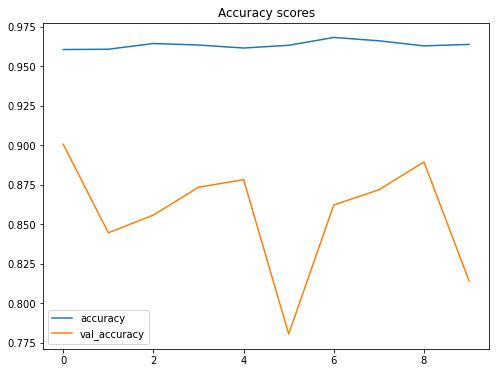

<Figure size 576x432 with 0 Axes>

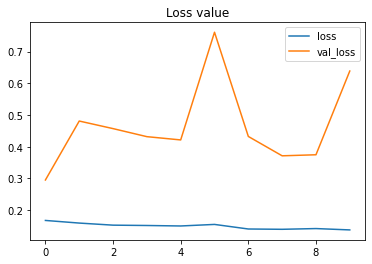

In [ ]:
#plotting accuracy vs validation accuracy
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show(plt.figure(figsize=(8,6)))
#plotting loss vs validation loss
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()